# Project: Investigate a Dataset (TMDb movie data)
### Start

# introduction
###### This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
### questions
#### how much grow in movies revenue since 1960 till 2015 ?
##### how many movies had made with those genre (Adventure,Action,Scince Fiction,Thriller,Fantasy,Crime)?


In [1]:
####### reading libraries
import pandas as pd
import numpy as np
import matplotlib as plt
###### read file
df= pd.read_csv('tmdb-movies.csv')

# Data Wrangle
## assessing data
###### some columns have multiple values like genres
###### some columns have _adj at end budget_adj and revenue_adj
###### some data hase wrong type id should be string
###### there a duplicated raw movie with id 42194

In [2]:
### display some details of the data(first 5 raws and datatypes and duplicated raws) to detect the problems in it and 
def assess_the_data(df):
    print(df.info())
    print(df.head())
    print(df[df.duplicated()])
assess_the_data(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8040 non-null   object 
 10  keywords              9374 non-null   object 
 11  overview              10860 non-null  object 
 12  runtime               10866 non-null  object 
 13  genres                10843 non-null  object 
 14  production_companies  9845 non-null   object 
 15  release_date       

## clean data

##### some column has multiple values so i splited them into 4 columns one for each value

In [3]:
#split the column with | to for columns
x=df['genres'].str.split('|',expand=True)
df['genre 1']=x[0]
df['genre 2']=x[1]
df['genre 3']=x[2]
df['genre 4']=x[3]
z=df['cast'].str.split('|',expand=True)
df['actor1']=z[0]
df['actor2']=z[1]
df['actor3']=z[2]
df['actor4']=z[3]
df.drop(columns=['cast','genres'],inplace=True)

##### some columns have a _adj at the end so i renamed it to in US Dollars

In [4]:
#renaming the columns
df=df.rename(columns={'budget_adj':'budget in US Dollars','revenue_adj':'revenue in US Dollars'})
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,homepage,director,tagline,keywords,...,Unnamed: 23,Unnamed: 24,genre 1,genre 2,genre 3,genre 4,actor1,actor2,actor3,actor4
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,...,NaN,NaN,Action,Adventure,Science Fiction,Thriller,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,...,NaN,NaN,Action,Adventure,Science Fiction,Thriller,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,...,NaN,NaN,Adventure,Science Fiction,Thriller,None,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,...,NaN,NaN,Action,Adventure,Science Fiction,Fantasy,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,...,NaN,NaN,Action,Crime,Thriller,None,Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez


##### some data has wrong type like release date and id

In [5]:
#change the data type to string
df['id']=df['id'].astype('str')

##### duplictated raw

In [6]:
#remmoving duplicated raws

df=df.drop_duplicates()

### exploration 

## question 1
#### how much grow in movies revenue since 1960 till 2015 ?

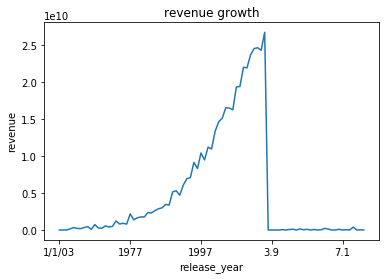

In [7]:
# group the data by year and ploting  it 
revenue_each_year=df.groupby('release_year').sum()['revenue']

revenue_each_year.plot(kind='line',ylabel='revenue',title='revenue growth')

## question 2
##### how many movies had made with those genre (Adventure,Action,Scince Fiction,Thriller,Fantasy,Crime)?

In [8]:
#counting Adventure movies
adventure_movies=df[(df['genre 1']=='Adventure')| (df['genre 2']=='Adventure')|(df['genre 3']=='Adventure')|(df['genre 4']=='Adventure') ]
adventure_movies_count=adventure_movies['id'].count()

In [9]:
#counting Action movies
action_movies=df[(df['genre 1']=='Action')| (df['genre 2']=='Action')|(df['genre 3']=='Action')|(df['genre 4']=='Action') ]
action_movies_count=action_movies['id'].count()

In [10]:
#counting Science fiction movies 
science_fiction_movies=df[(df['genre 1']=='Science Fiction')| (df['genre 2']=='Science Fiction')|(df['genre 3']=='Science Fiction')|(df['genre 4']=='Science Fiction') ]
science_fiction_movies_count=science_fiction_movies['id'].count()

In [11]:
#counting Thriller movies
Thriller_movies=df[(df['genre 1']=='Thriller')| (df['genre 2']=='Thriller')|(df['genre 3']=='Thriller')|(df['genre 4']=='Thriller') ]
Thriller_movies_count=Thriller_movies['id'].count()

In [12]:
#counting Fantasy movies
fantasy_movies=df[(df['genre 1']=='Fantasy')| (df['genre 2']=='Fantasy')|(df['genre 3']=='Fantasy')|(df['genre 4']=='Fantasy') ]
fantasy_movies_count=fantasy_movies['id'].count()

In [13]:
#counting Crime movies
crime_movies=df[(df['genre 1']=='Crime')| (df['genre 2']=='Crime')|(df['genre 3']=='Crime')|(df['genre 4']=='Crime') ]
crime_movies_count=crime_movies['id'].count()

In [14]:
#make data frame to count
movies_count=pd.DataFrame({'Adventure':[adventure_movies_count],'Action':[action_movies_count],'Science Fiction':[science_fiction_movies_count],'Thriller':[Thriller_movies_count],'fantasy_movies':[fantasy_movies_count],'Crime':[crime_movies_count]})

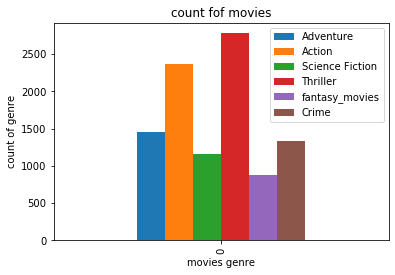

In [15]:
#plot
movies_count.plot.bar(ylabel='count of genre',xlabel='movies genre',title='count fof movies')

## Conclusions
###### in the first question the growth in movies revenues is increasing over time it starts on 1960 with less than .5(145005000) billion and increased until it reach more than 26 billon (26762450518) at 2015

###### in the second one the number of movies of has Thriller in genres are made the most with more than 2500 movie (2787movie) and the movies with fantasy in it`s genres are made the least among the options with less than 1000 (875 movie)

###### the data provided in this dataset is sufficant to answer my questions 
###### the size of data set was good to display an analysis to a good period of time
###### the major difculty of this data set was multiple data in one column
###### dropping lines was not an issue 